# Non Uniform Sampling & Reconstruction


In this notebook we see the methods and aplications of Non-Uniform Sampling with some emphasis on Compressive Sensing Technique. 

This notebook was prepared as a part of coursework for DA623: Computing with Signals. It assumes pre-requsite knowledge of Fourier Transforms, Nyquist Frequency and Matrix Algebra.

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fftpack import dct, idct
import scipy.optimize as spopt
import scipy.fftpack as spfft
from scipy.optimize import minimize
import cosamp_fn as csmp


plt.rcParams['figure.figsize'] = [12, 6]
plt.rcParams.update({'font.size': 18})

## What is Sampling?

Real world data is mostly analog and continuous. While however much we look at the clock, time is always slipping away and when we are awake we always hear sound, even with a sound canceling headphone one could argue we hear silence.

Practical signals are always continuos, while we might not be sensitive enough to percieve the fineness of many signals like in the case of sound where we might not be able to tell the difference between two similarly "loud" signals,  they nevertheless can take a wide range of continuous values.

Let's plot a signal which has 2 frequency components, frequency values of 6.23 (from our course name) and its palindrome. For the sake of plotting they are divided by 100.

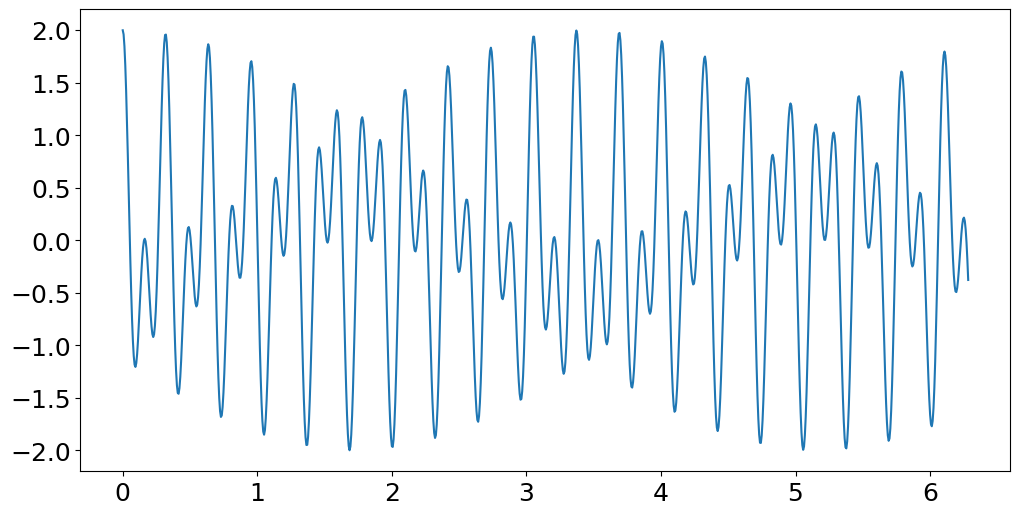

In [6]:
t = np.linspace(0, 2*np.pi, 1000)
x = np.cos(2*6.23*np.pi*t)+np.cos(2*3.26*np.pi*t)

plt.plot(t, x)
plt.show()

Plotted above is a wave, about as continuous as these things come, but if you look at the code line

``` t = np.linspace(0, 2*np.pi, 1000)```

This selects 1000 points between 0 and 2π, and then computes the value of sine wave on these 1000 points and because our eyes can not zoom enough we percieve, the interpolation of these values as a continuous sine wave.

Let's tweak the same code a bit.

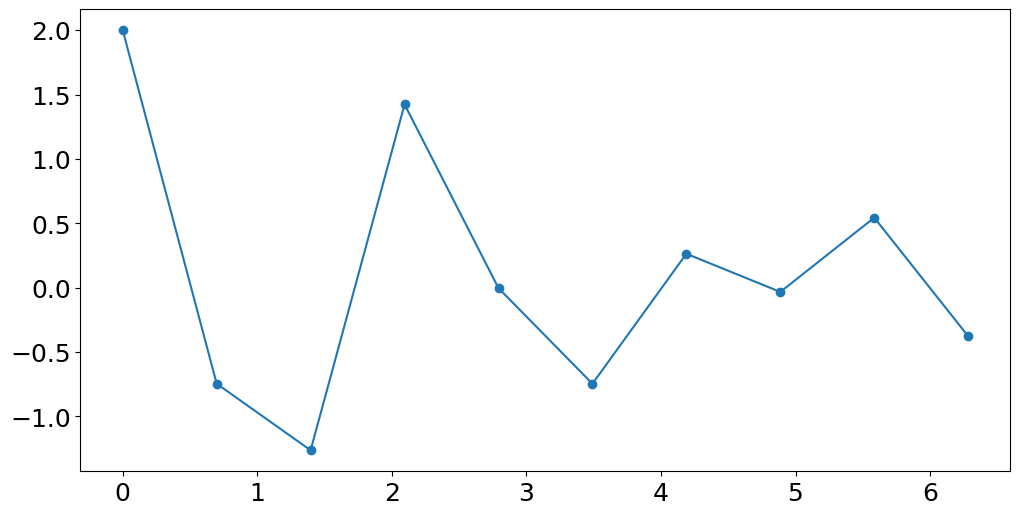

In [7]:
import numpy as np
import matplotlib.pyplot as plt

t2 = np.linspace(0, 2*np.pi, 10)
x2 = np.cos(2*6.23*np.pi*t2)+np.cos(2*3.26*np.pi*t2)

plt.plot(t2, x2, '-o')
plt.show()

Now our signal suddenly doesn't look as good right? We succesfully converted a continuous signal to discrete signal. Infact one might argue that there are no continuous signals and all the signals are just discrete signals with the appropriate \(not so\) no. of samples.

So what we have done here is varying the $sampling$ rate.

Now we should define sampling as well, sampling is conversion of continuous signals into discrete signals by selecting only  some of the data points among many.

Mathematically SAMPLING is just the signal's multiplication with a train of pulses. If we are doing uniform sampling these pulses are uniformly distributed.


Now that we know that our signal is only as good as continuous as we sample it. Let us see how we can reconstruct our signal from the uniform sampling we have done. The catch is till when can we?

This domain is pretty well guarded by the **Shannon-Nyquist rate** and we just state it here, that tells us that for a band limited signal, if we sample at a rate equal to or greater than twice the highest frequency component of our signal we can reconstruct the signal and avoid aliasing and this sampling rate of twice the highest frequency is called the Nyquist rate.

## Non Uniform Sampling
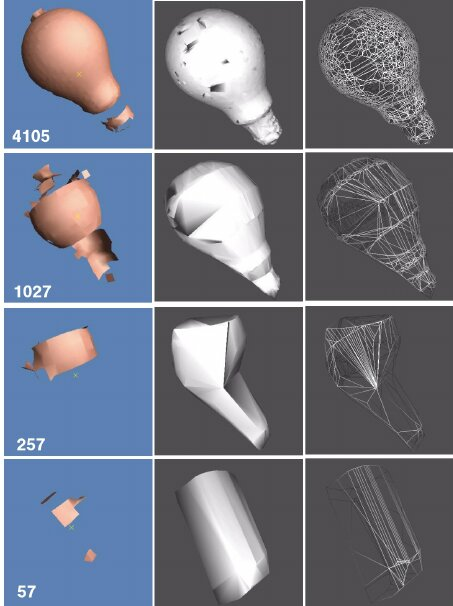

As the name suggests, non uniform sampling means that we are recording/ getting our samples not uniformly in the domain.

### Methods of Reconstruction from Non-Uniform Sampling

Now our problem statement is quite straight-forward, we have non-uniformly spaced samples of our signals, we want to get back our original signal. Here are the prevalent methods.

1.   **Interpolation**: Interpolation is just the process of connecting the dots quite literally. We have already seen this, by default when we ran the first code cell of the signal, our machine gave back the linear interpolation, but because the number of samples were quite high, we couldn't notice the difference. We might also apply other kinds of interpolation like the polynomial interpretation.

2.   **Machine Learning**: We can apply Deep Learning Models like CNN, RNN or Generative Models (GANs) on the input and output data to obtain more samples of the signal and then use interpolation or other reconstruction methods for this.

3.   **Transform Methods**: Techniques like Fourier Transform, Discrete Cosine Transform (DCT) or wavelet transform can be employed to non-uniformly sampled signal for reconstuction in frequency domain. Wavelet transform works similarly to the Fourier Transform, but instead of using sines/cosines as bases, it uses localized waveforms that are limited in time and frequency as its bases 

4.   **Compressive Sensing**: Compressive Sensing is a method to deal with sparse non-uniformly sampled signals and their reconstruction. We'll see more about it in the next section.

### Compressive Sensing

Compressive Sensing is an exciting new field. While in normal compressions we collect high resolution data and due to compression disregard most of the data, Compressed Sensing asks to collect only few compressed or random samples and then deduce what that sparse representation is in the transformed basis

Mathematically, compressed sensing exploits the sparsity of a signal in a generic basis to achieve full signal reconstruction from surprisingly few measurements.  
If a signal x is K-sparse in Ψ, then instead of measuring x directly (n measurements) and then compressing, it is possible to collect dramatically fewer randomly chosen or compressed measurements and then solve for the
nonzero elements of s in the transformed coordinate system. The measurements y ∈ ${R}^p$, with K < p << n are given by

**Compressive Sensing Formulation:**
\begin{align*}
\text{Original Signal:} & \quad \mathbf{x} \in \mathbb{R}^n \\
\text{Measurement Matrix:} & \quad \mathbf{C} \in \mathbb{R}^{p \times n} \\
\text{Compressed Measurements:} & \quad \mathbf{y} = \mathbf{C}\mathbf{x} \\
\end{align*}

The measurement matrix C is very important, and represents a set of p measurements on x. Typically mesurements may consist of random projection of the state, or just individual entries of the state

\begin{align*}
\text{} & \quad \mathbf{y} = \mathbf{C}\mathbf{\Psi}_s  = \mathbf{\Theta}\mathbf{s}\\
\text{Reconstruction:} & \quad \hat{\mathbf{s}} = \arg\min_{\mathbf{s}} ||\mathbf{s}||_1 \quad \text{subject to} \quad \mathbf{y} = \mathbf{C}\mathbf{x}
\end{align*}

Thus the goal of compressed sensing is to find the sparsest representation $\hat{s}$ to the under-determined system that minimizes the L1 norm under certain conditions on C. We will not go into more details of this here, interested readers can go through this research paper by __[Candes & Wakin](https://www.researchgate.net/publication/3322018_Wakin_MB_An_introduction_to_compressive_sampling_IEEE_Signal_Process_Mag_252_21-30)__. 



For example let us consider a wave consisting of 2 frequencies 6.23 Hz and 62.3 Hz, we calculate, its fourier transform as well as the **Power Spectral Density**, which is nothing but just a measure of how much energy does each frequency contain in the signal.

In [51]:
n = 500
t3 = np.linspace(0, 1, n)
x3 = np.cos(2*6.23*np.pi*t3)+np.cos(2*62.3*np.pi*t3)
xf = np.fft.fft(x3)
psd = xf*np.conj(xf)/n

Text(0.5, 0, 'Time, s')

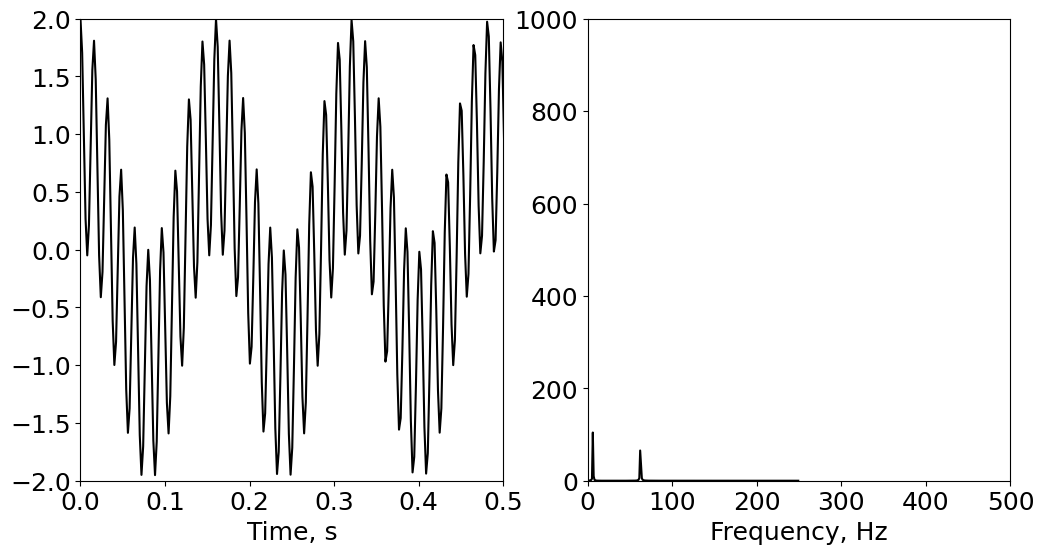

In [107]:
freq = np.arange(n)
L = int(np.floor(n/2))

fig, axs = plt.subplots(1,2)
axs = axs.reshape(-1)

axs[1].plot(freq[:L], psd[:L], color='k')
axs[1].set_xlim(0, 500)
axs[1].set_ylim(0, 1000)
axs[1].set_xlabel('Frequency, Hz')

axs[0].plot(t3, x3, color='k')
axs[0].set_xlim(0, 0.5)
axs[0].set_ylim(-2, 2)
axs[0].set_xlabel('Time, s')

So we have plotted the signal in the time and frequency domain. We can see that the signal contains only 2 frequencies in the frequency domain but does not look that simple in the time domain. The question is that can we sample under the Nyquist Rate and somehow reconstruct the signal.

Nyquist states that we can not if we sample under twice the highest frequency that is 2\*62.3 \= 124.5 Hz. Let us take 50 points selected randomly, and plot the function of these 50 points. Note that 50 points is much Nyquist Rate.

In [116]:
p = 50
perm = np.floor(np.random.rand(p)*n).astype(int)
y = x3[perm]

Text(0.5, 0, 'Time, s')

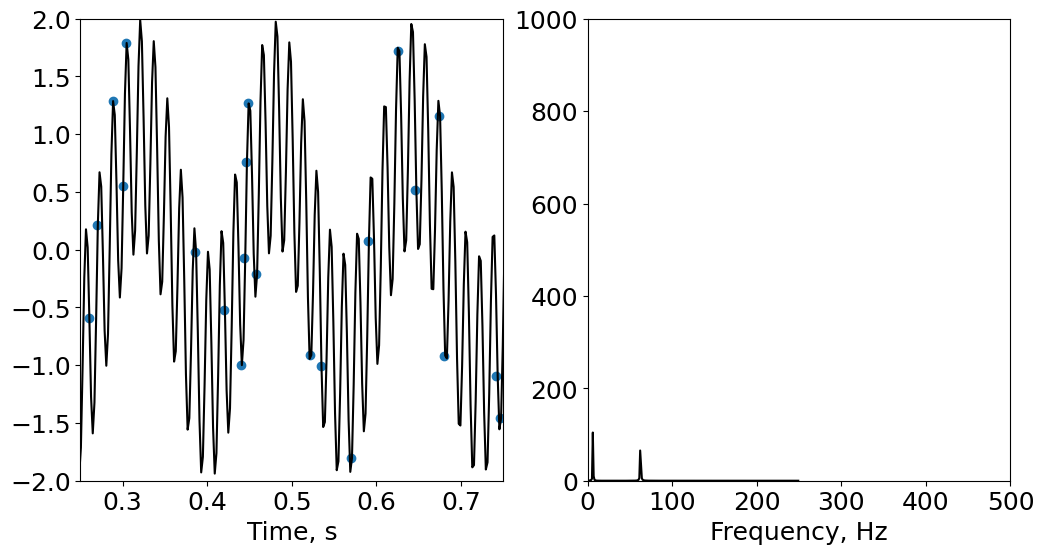

In [117]:
freq = np.arange(n)
L = int(np.floor(n/2))

fig, axs = plt.subplots(1,2)
axs = axs.reshape(-1)

axs[1].plot(freq[:L], psd[:L], color='k')
axs[1].set_xlim(0, 500)
axs[1].set_ylim(0, 1000)
axs[1].set_xlabel('Frequency, Hz')

axs[0].plot(t3, x3, color='k')
axs[0].scatter(perm/n, y)
axs[0].set_xlim(0.25, 0.75)
axs[0].set_ylim(-2, 2)
axs[0].set_xlabel('Time, s')

We can see that these points are scattered randomly, and are not uniform. Now let's try to apply some functions to reconstruct this signal. 
Now we find our ${\Psi}$ and ${\Theta}$ functions. Then we find the sparsest $\hat{s}$ which satisfies our requirement. Our reconstruction signal is simply its transform.

A note on the CoSaMP function: Now to get the actual $\hat{s}$ function we have to minimize the norm given the condition. There are various algorithms for it namely Basis Pursuit, Convex Optimization and Matching Pursuit. CoSaMP or Compressive Sampling by Matching Pursuit is one such algorithm. We are going to use it here for our code. Interested readers might go through __[CoSaMP](https://arxiv.org/abs/0803.2392)__ for more background on this.

In [118]:
psi = dct(np.identity(n))
theta = psi[perm,:]

s = csmp.cosamp(theta, y, 10, epsilon=1.e-10, max_iter=10)
xrecon = idct(s)

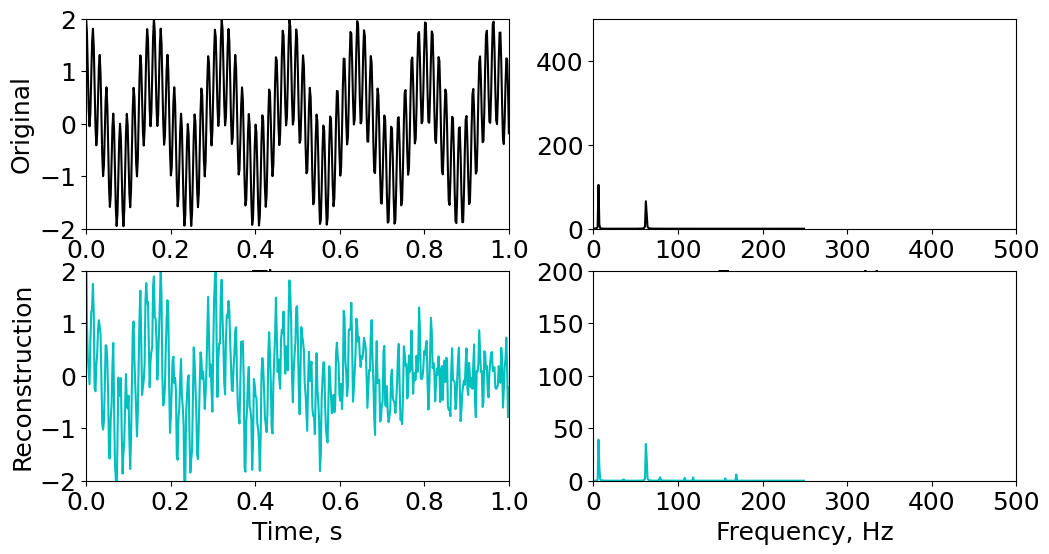

In [120]:
freq = np.arange(n)
L = int(np.floor(n/2))

fig, axs = plt.subplots(2,2)
axs = axs.reshape(-1)

axs[1].plot(freq[:L], psd[:L], color='k')
axs[1].set_xlim(0, 500)
axs[1].set_ylim(0, 500)
axs[1].set_xlabel('Frequency, Hz')

axs[0].plot(t3, x3, color='k')
axs[0].set_xlim(0, 1)
axs[0].set_ylim(-2, 2)
axs[0].set_xlabel('Time, s')
axs[0].set_ylabel('Original')


axs[2].plot(t3, xrecon, color='c')
axs[2].set_xlim(0, 1)
axs[2].set_ylim(-2, 2)
axs[2].set_xlabel('Time, s')
axs[2].set_ylabel('Reconstruction')

xtrecon = np.fft.fft(xrecon, n)
psdrecon = xtrecon*np.conj(xtrecon)/n

axs[3].plot(freq[:L], psdrecon[:L], color='c')
axs[3].set_xlim(0, 500)
axs[3].set_ylim(0, 200)
axs[3].set_xlabel('Frequency, Hz')
plt.show()

We can see that have a reasonbly good reconstruction much below the specified Nyquist limit without aliasing.

## Applications

While we are living in the age of data and compute, nevertheless non-uniform sampling can help in various scenarios such as:

1.   When data is not uniformly distributed, then our important features of the signal, which are present in a certain portion of our signal should be given more weightage.
2.   In highly dimensional data, non uniform sampling will reduce the number of samples and help us identify underlying patterns.
3.   When the event we are searching for is an outlier, we can focus our efforts on regions where the probability of anomaly occurence is high. e.g. Anomaly Detection
4.  In scenarios where we incur a cost every time we sample, we might be well off using non uniform sampling with more samples at times where we want to focus on.
5.  We might not always have access to all the samples, in those cases also, non-uniform sampling can come quite handy.

Hope You Had Fun Reading this notebook. Adios.